<a href="https://colab.research.google.com/github/farahshahhoud/Machine_Learning/blob/master/Second_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Часть 1.

In [0]:
import numpy as np
import pandas as pd

In [0]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1. How many men and women (sex feature) are represented in this dataset?

In [0]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

2. What is the average age (age feature) of women?

In [0]:
print(data.loc[data['sex']=='Female','age'].mean())

36.85823043357163


3. What is the proportion of German citizens (native-country feature)?

In [0]:
print((data['native-country']=='Germany').sum()/data.shape[0])

0.004207487485028101


4. What are the mean and standard deviation of age for those who earn more than 50K per year (salary feature) 
5. and those who earn less than 50K per year?

In [0]:
print(data.loc[data['salary']=='>50K','age'].mean())
print(data.loc[data['salary']=='>50K','age'].std())
print(data.loc[data['salary']=='<=50K','age'].mean())
print(data.loc[data['salary']=='<=50K','age'].std())

44.24984058155847
10.51902771985177
36.78373786407767
14.020088490824813


6. Is it true that people who earn more than 50K have at least high school education? (education – Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)

In [0]:
data.loc[data['salary']=='>50K','education'].unique()

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

7. Display statistics of age for each race (race feature) and each gender. Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.

In [0]:
for element in data.groupby(['race','sex']):
  print(element[0])
  print(element[1]['age'].describe())

8. Among whom the proportion of those who earn a lot(>50K) is more: among married or single men (marital-status feature)? Consider married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.

In [0]:
data.loc[(data['sex']=='Male')&(data['marital-status'].str.startswith('Married')),'salary'].value_counts()

<=50K    7576
>50K     5965
Name: salary, dtype: int64

In [0]:
data.loc[(data['sex']=='Male')&(data['marital-status'].isin(
    ['Never-married', 'Separated', 'Divorced','Widowed'])),'salary'].value_counts()

<=50K    7552
>50K      697
Name: salary, dtype: int64

9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours, and what is the percentage of those who earn a lot (>50K) among them?

In [0]:
maximum=data['hours-per-week'].max()
working=data[data['hours-per-week']==maximum].shape[0]
high=data[(data['hours-per-week']==maximum) & (data['salary']=='>50K')].shape[0]
print(maximum)
print(working)
print(high/working)


99
85
0.29411764705882354


10. Count the average time of work (hours-per-week) for those who earn a little and a lot (salary) for each country (native-country). What will these be for Japan? 

In [0]:
for element in data.groupby(['native-country','salary']):
  print (element[0])
  print(element[1]['hours-per-week'].mean())


## Часть 2.

In [0]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=5ac14a3412ba13067c03e8eb47b878cebf3d9b66fc89820d32013b6616b77400
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [0]:
%matplotlib inline
import pandas as pd
import pandasql as ps
from datetime import datetime
import seaborn
import matplotlib.pyplot as plt

In [0]:
%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [0]:
user_usage_data=pd.read_csv("user_usage.csv")
user_device_data=pd.read_csv("user_device.csv")
device_data=pd.read_csv("android_devices.csv")

In [0]:
user_usage_data.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [0]:
user_device_data.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [0]:
device_data.head()

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A


In [0]:
device_data.rename(columns={"Retail Branding": "manufacturer"}, inplace=True)

In [0]:
def connect_pandasql(user_usage_data):
  query="""SELECT user_usage.* , user_device.platform, 
  user_device.device FROM user_usage_data as user_usage
   inner join user_device_data as user_device on 
    user_usage.use_id=user_device.use_id;"""
  result_pandasql=ps.sqldf(query)
  query="""SELECT result_pandasql.* , device.'manufacturer', 
  device.Model FROM result_pandasql as result_pandasql
   inner join device_data as device on 
    result_pandasql.device=device.Model;"""
  return ps.sqldf(query)

In [0]:
result_pandasql=connect_pandasql(user_usage_data)
result_pandasql.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F,Samsung,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F,Samsung,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303,Sony,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F,Samsung,SM-G361F


In [0]:
def connect_pandas(user_usage_data):
  result_pandas = pd.merge(user_usage_data,
                 user_device_data[['use_id', 'platform', 'device']],
                 on='use_id')
  return  pd.merge(result_pandas,
                   device_data[['manufacturer', 'Model']],
                  left_on='device',
                  right_on='Model',
                  how='inner')

In [0]:
result_pandas=connect_pandas(user_usage_data)
result_pandas.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device,manufacturer,Model
0,21.97,4.82,1557.33,22787,android,GT-I9505,Samsung,GT-I9505
1,69.80,14.70,25955.55,22801,android,GT-I9505,Samsung,GT-I9505
2,249.26,253.22,1557.33,22875,android,GT-I9505,Samsung,GT-I9505
3,249.26,253.22,1557.33,22876,android,GT-I9505,Samsung,GT-I9505
4,83.46,114.06,3114.67,22880,android,GT-I9505,Samsung,GT-I9505


In [0]:
def group_pandasql(result_pandasql):
  query="""SELECT manufacturer,AVG(outgoing_mins_per_month),AVG(outgoing_sms_per_month),
      AVG(monthly_mb),Count(use_id) FROM result_pandasql GROUP BY manufacturer;
      """
  return ps.sqldf(query)

In [0]:
aggre_pandasql=group_pandasql(result_pandasql);
aggre_pandasql

,manufacturer,AVG(outgoing_mins_per_month),AVG(outgoing_sms_per_month),AVG(monthly_mb),Count(use_id)
0,HTC,299.842955,93.059318,5144.077955,44
1,Huawei,81.526667,9.500000,1561.226667,3
2,LGE,111.530000,12.760000,1557.330000,2
3,Lava,60.650000,261.900000,12458.670000,2
4,Lenovo,215.920000,12.930000,1557.330000,2
5,Motorola,95.127500,65.666250,3946.500000,16
6,OnePlus,354.855000,48.330000,6575.410000,6
7,Samsung,191.010093,92.390463,4017.318889,108
8,Sony,177.315625,40.176250,3212.000625,16
9,Vodafone,42.750000,46.830000,5191.120000,1


In [0]:
def group_pandas(result_pandas):
  return result_pandas.groupby("manufacturer").agg({
        "outgoing_mins_per_month": "mean",
        "outgoing_sms_per_month": "mean",
        "monthly_mb": "mean",
        "use_id": "count"
    })

In [0]:
aggre_pandas=group_pandas(result_pandas)
aggre_pandas

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
manufacturer,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


In [0]:
import time

def count_mean_time(func, params, N =10):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        tmp=func(params)
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

In [0]:
pandasql_time = count_mean_time(connect_pandasql,user_usage_data)
pandas_time = count_mean_time(connect_pandas,user_usage_data)
print("Mean time for executing connecting tables using:")
print("pandasql is {} - pandas is {}".format('%.4f'%pandasql_time,'%.4f'%pandas_time))

Mean time for executing connecting tables using:
pandasql is 0.1721 - pandas is 0.0093


In [0]:
pandasql_time = count_mean_time(group_pandasql,result_pandasql)
pandas_time = count_mean_time(group_pandas,result_pandas)
print("Mean time for executing aggregation of tables using:")
print("pandasql is {} - pandas is {}".format('%.4f'%pandasql_time,'%.4f'%pandas_time))

Mean time for executing aggregation of tables using:
pandasql is 0.0227 - pandas is 0.0026


In [0]:
def count_mean_time2(func, params, N =5):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        tmp_df = func(params)
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

In [0]:
ex1_times = []
for count in range(50, 200, 10):
    pandasql_time = count_mean_time2(connect_pandasql, user_usage_data[:count])
    pandas_time = count_mean_time2(connect_pandas, user_usage_data[:count])
    ex1_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

In [0]:
ex1_times_df = pd.DataFrame(ex1_times)
ex1_times_df.columns = ['number of rows in user_usage_data', 'pandas time', 'pandasql time']
ex1_times_df = ex1_times_df.set_index('number of rows in user_usage_data')

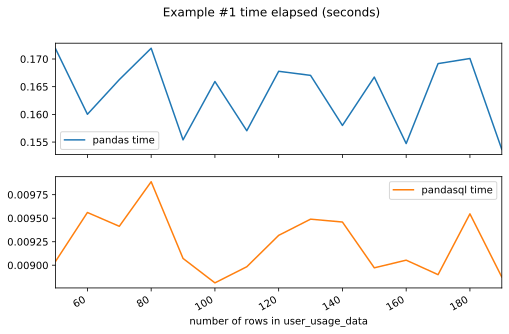

In [0]:
ax = ex1_times_df.plot(title = 'Example #1 time elapsed (seconds)', subplots = True)


In [0]:
ex1_times = []
for count in range(50, 200, 10):
    pandasql_time = count_mean_time2(group_pandasql, result_pandasql[:count])
    pandas_time = count_mean_time2(group_pandas, result_pandas[:count])
    ex1_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

In [0]:
ex1_times_df = pd.DataFrame(ex1_times)
ex1_times_df.columns = ['number of rows in user_usage_data', 'pandas time', 'pandasql time']
ex1_times_df = ex1_times_df.set_index('number of rows in user_usage_data')

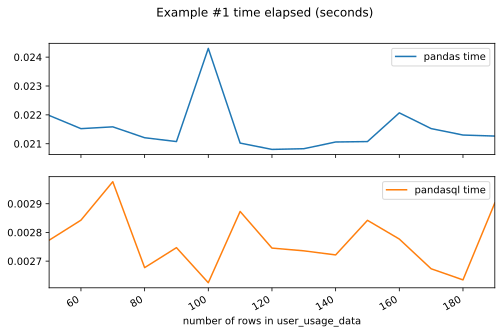

In [0]:
ax = ex1_times_df.plot(title = 'Example #1 time elapsed (seconds)', subplots = True)